In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import *

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data['drug_name'].unique()

array(['5-FU', 'ABT-888', 'AZD1775', 'BEZ-235', 'Bortezomib',
       'Carboplatin', 'Cyclophosphamide', 'Dasatinib', 'Dexamethasone',
       'Dinaciclib', 'Doxorubicin', 'Erlotinib', 'Etoposide',
       'geldanamycin', 'Gemcitabine', 'L778123', 'Lapatinib', 'Metformin',
       'Methotrexate', 'Mitomycine', 'MK-2206', 'MK-4541', 'MK-4827',
       'MK-5108', 'MK-8669', 'MK-8776', 'MRK-003', 'Oxaliplatin',
       'Paclitaxel', 'PD325901', 'SN-38', 'Sorafenib', 'Sunitinib',
       'Temozolomide', 'Topotecan', 'Vinblastine', 'Vinorelbine',
       'Zolinza'], dtype=object)

In [4]:
#for x in data['cell_line'].unique():
    #if len(data.loc[(data['drug_name'] == 'Gemcitabine') & (data['cell_line'] == x)]) == 8:
        #print(data.loc[(data['drug_name'] == 'Gemcitabine') & (data['cell_line'] == x)][['Drug_concentration (µM)',
                                                               #                'viability1', 'viability2', 'viability3', 'viability4', 'viability5','viability6']].isnull().sum().sum())
    

In [5]:
#

data = data.loc[(data['drug_name'] == 'Gemcitabine') & (data['cell_line'] == 'OCUBM')][['Drug_concentration (µM)',
                                                                               'viability1', 'viability2', 'viability3', 'viability4', 'viability5','viability6']]

data.reset_index(drop=True)

,Drug_concentration (µM),viability1,viability2,viability3,viability4,viability5,viability6
0,0.000005,0.90682,1.05148,0.92679,1.08383,1.15320,1.06123
1,0.000014,0.93563,0.97162,0.95945,1.00628,1.11447,0.94414
2,0.000040,0.86798,0.89906,0.93613,1.09654,0.94527,0.97272
3,0.000120,0.96033,0.86525,0.97539,1.01745,1.08319,0.98214
4,0.000370,1.12211,1.02707,1.17835,0.96449,1.07197,1.06006
5,0.001100,0.91735,0.65056,0.85712,0.92735,0.90332,0.75801
6,0.003400,0.26267,0.27456,0.29037,0.23003,0.37493,0.31472
7,0.010000,0.10191,0.08572,0.10203,0.06934,0.10010,0.08854


In [6]:
X = np.log10(sum([data['Drug_concentration (µM)'].values.tolist()]*6,[]))
y= sum([data.iloc[:,i].values.tolist() for i in range(1,7)],[])

In [7]:
df = pd.DataFrame({'y':y,'X':X })

In [8]:
y = df.y
X= df.X

In [9]:
n = len(df)
h=0.15



In [11]:
random.seed(240)

omega = bernoulli.rvs(pi(y,1,1), size=n)

pi_hat = [pi_hat(h,z,y,pi(y,1,1),omega) for z in np.linspace(-5.5, -2, n)]


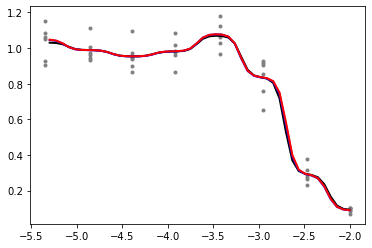

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=3)
#NW
ax.plot(np.linspace(-5.3, -2, n),[nw(h,t,X,y) for t in np.linspace(-5.3, -2,n)],color= 'black', lw=2)

#HT NW
ax.plot(np.linspace(-5.3, -2, n),[nw_mis(h,t,X,y,pi(y,1,1),omega) for t in np.linspace(-5.3, -2, n)],'-g',color= 'blue', lw=2)
#
ax.plot(np.linspace(-5.3, -2, n),[nw_mis(h,t,X,y,pi_hat,omega) for t in np.linspace(-5.3, -2, n)],'-g',color= 'red', lw=2)

In [13]:
#Variance estimation 

m_hat_nw = [nw(h,t,X,y) for t in X ]

m_hat_hw = [nw_mis(h,t,X,y,pi(y,1,1),omega) for t in X ]

m_hat_hw_est = [nw_mis(h,t,X,y,pi_hat,omega) for t in X]

#Residual estimates 

r_hat = (y-m_hat_nw)**2

r_hat_hw = (y-m_hat_hw)**2

r_hat_hw_est = (y-m_hat_hw_est)**2


In [14]:
diff = []
for i in range(1,len(y)):
        diff.append(((y[i-1]-y[i])**2)/2)

[]

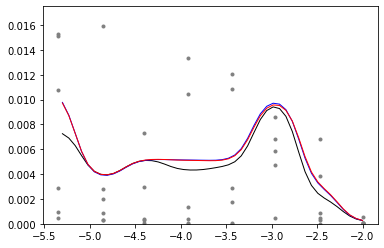

In [38]:
h1 = 0.2
h2 = h1 

fig, ax = plt.subplots(1, 1)
ax.plot(X,r_hat,'o',color='grey',markersize=3)
ax.plot(np.linspace(-5.3, -2,  n),[sigma_res(h1,t,X,r_hat)**2 for t in np.linspace(-5.3, -2, n)],color= 'black', lw=1)

ax.plot(np.linspace(-5.3, -2,  n),[sigma_mis_res(h2,t,X,r_hat_hw,pi(y,1,1),omega)**2 for t in np.linspace( -5.3, -2, n)],'-g',color= 'blue', lw=1)
ax.plot(np.linspace(-5.3, -2,  n),[sigma_mis_res(h2,t,X,r_hat_hw_est,pi_hat,omega)**2 for t in np.linspace( -5.3, -2, n)],'-g',color= 'red', lw=1)

ax.set_ylim(0,0.0175)

ax.plot()



[]

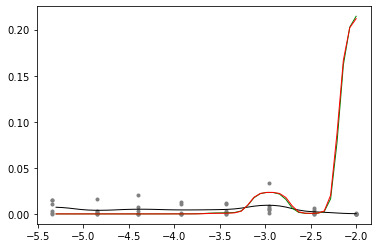

In [59]:
#Sehr hohe Bandweite um sich anzunähern



fig, ax = plt.subplots(1, 1)
ax.plot(X,r_hat,'o',color='grey',markersize=3)
ax.plot(np.linspace(-5.3, -2,  n),[sigma_res(h1,t,X,r_hat)**2 for t in np.linspace(-5.3, -2, n)],color= 'black', lw=1)


ax.plot(np.linspace(-5.3, -2, n), [nw(h,t,X[:(len(X)-1)],diff)**2 for t in np.linspace(-5.3, -2, n)],'-g',color= 'green', lw=1)

#Ab Bandweite 4 annähern
ax.plot(np.linspace(-5.3, -2, n),[nw_mis(h,t,X[:(len(X)-1)],diff,pi_hat[:(len(pi_hat)-1)],omega[:(len(omega)-1)])**2 for t in np.linspace(-5.3, -2, n)],'-g',color= 'red', lw=1)

#x.plot(np.linspace(-5.3, -2,  n),[diff_vol_mis(2.5,t,X,y,pi(y,1,1),omega,n) for t in np.linspace(-5.3, -2, n)],'-g',color= 'grey', lw=3)##
#ax.set_ylim(0,0.0175)


ax.plot()

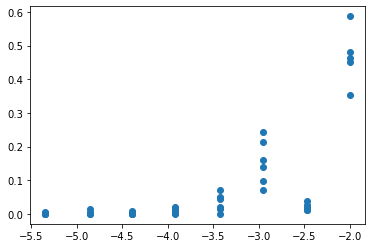

In [18]:
plt.scatter(X[:(len(X)-1)],diff)